<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━╸━━━━━━━━━━━━━━━╸━━━━━━   0.0 B /  ??.?MB @ 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [7]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [9]:
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text

Parse the html data using `beautiful_soup`.


In [10]:
from bs4 import BeautifulSoup

# Assuming html_data is your HTML content
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [11]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage containing the HTML table
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Fetch the HTML content from the URL
response = requests.get(url)
html_content = response.text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing quarterly revenue data
revenue_table = soup.find_all("tbody")[1]

# Extract data from the table
rows = revenue_table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)  # add only if row is not empty

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Print the DataFrame
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [12]:
print(tesla_revenue.columns)


Index(['Date', 'Revenue'], dtype='object')


Execute the following lines to remove an null or empty strings in the Revenue column.


In [13]:

tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'] = tesla_revenue['Revenue'].str.replace(',|\$', "")


In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [15]:
print(tesla_revenue.tail())

          Date Revenue Tesla Quarterly Revenue(Millions of US $)
48  2010-09-30     $31                                        31
49  2010-06-30     $28                                        28
50  2010-03-31     $21                                        21
52  2009-09-30     $46                                        46
53  2009-06-30     $27                                        27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [18]:
import yfinance as yf
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [19]:

gme_data = GameStop.history(Period='Max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [20]:
gme_data.reset_index(inplace=True)

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [21]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text

Parse the html data using `beautiful_soup`.


In [22]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Webpage downloaded successfully.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [23]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage containing the HTML table
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Fetch the HTML content from the URL
response = requests.get(url)
html_content = response.text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing GameStop revenue data
revenue_table = soup.find_all("tbody")[1]

# Extract data from the table
rows = revenue_table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)  # add only if row is not empty

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Remove commas and dollar signs from the 'Revenue' column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[\$,]', '', regex=True)

# Print the DataFrame
print(gme_revenue)

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [24]:
print(gme_revenue.tail())

          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31        
52  2009-09-30      46
53  2009-06-30      27


In [26]:
print(gme_revenue.columns)

Index(['Date', 'Revenue'], dtype='object')


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [31]:
tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'] = pd.to_datetime(tesla_revenue['Revenue'])



['21454' '16934' '18756' '17719' '13757' '11958' '10389' '10744' '8771'
 '6036' '5985' '7384' '6303' '6350' '4541' '7226' '6824' '4002' '3409'
 '3288' '2985' '2790' '2696' '2285' '2298' '1270' '1147' '1214' '937'
 '955' '940' '957' '852' '769' '621' '615' '431' '405' '562' '306' '50'
 '27' '30' '39' '58' '49' '36' '31' '28' '21' '' '46']


In [34]:
# Replace empty strings with NaN
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('', float('nan'))

# Convert the 'Revenue' column to float
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

print(gme_revenue['Revenue'].unique())



[2.1454e+04 1.6934e+04 1.8756e+04 1.7719e+04 1.3757e+04 1.1958e+04
 1.0389e+04 1.0744e+04 8.7710e+03 6.0360e+03 5.9850e+03 7.3840e+03
 6.3030e+03 6.3500e+03 4.5410e+03 7.2260e+03 6.8240e+03 4.0020e+03
 3.4090e+03 3.2880e+03 2.9850e+03 2.7900e+03 2.6960e+03 2.2850e+03
 2.2980e+03 1.2700e+03 1.1470e+03 1.2140e+03 9.3700e+02 9.5500e+02
 9.4000e+02 9.5700e+02 8.5200e+02 7.6900e+02 6.2100e+02 6.1500e+02
 4.3100e+02 4.0500e+02 5.6200e+02 3.0600e+02 5.0000e+01 2.7000e+01
 3.0000e+01 3.9000e+01 5.8000e+01 4.9000e+01 3.6000e+01 3.1000e+01
 2.8000e+01 2.1000e+01        nan 4.6000e+01]


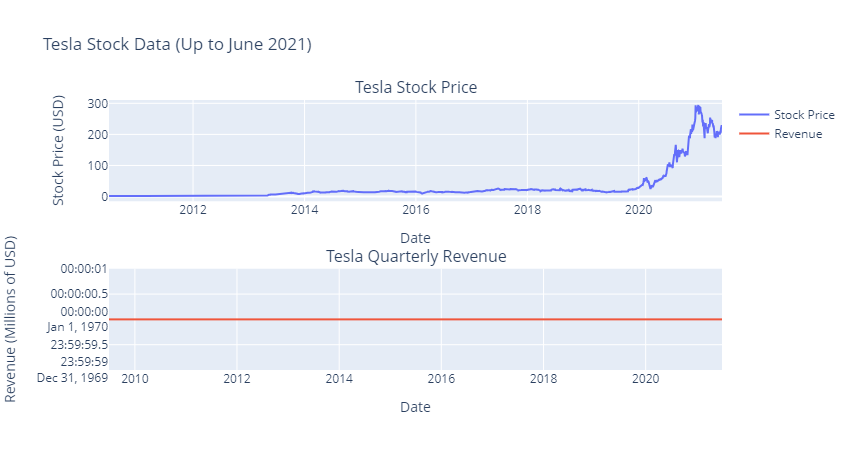

In [45]:

import pandas as pd

# Assuming you have already defined tesla_data and tesla_revenue DataFrames

# Set up the plot
fig = make_subplots(rows=2, cols=1, subplot_titles=("Tesla Stock Price", "Tesla Quarterly Revenue"))

# Select data up to June 2021
tesla_data_specific = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue_specific = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Plot Tesla stock price
fig.add_trace(go.Scatter(x=tesla_data_specific['Date'], y=tesla_data_specific['Close'], name="Stock Price"), row=1, col=1)

# Plot Tesla revenue
fig.add_trace(go.Scatter(x=tesla_revenue_specific['Date'], y=tesla_revenue_specific['Revenue'], name="Revenue"), row=2, col=1)

# Update x-axis labels
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

# Update y-axis labels
fig.update_yaxes(title_text="Stock Price (USD)", row=1, col=1)
fig.update_yaxes(title_text="Revenue (Millions of USD)", row=2, col=1)

# Update title
fig.update_layout(title="Tesla Stock Data (Up to June 2021)")

# Display the graph
fig.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


In [60]:
import pandas as pd

# Assuming historical share price data is stored in a CSV file named 'gme_stock_data.csv'
# Load the data into the gme_data DataFrame
gme_data = pd.read_csv('gme_stock_data.csv')

# Convert the 'Date' column to datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Verify the contents of the gme_data DataFrame
print(gme_data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'gme_stock_data.csv'

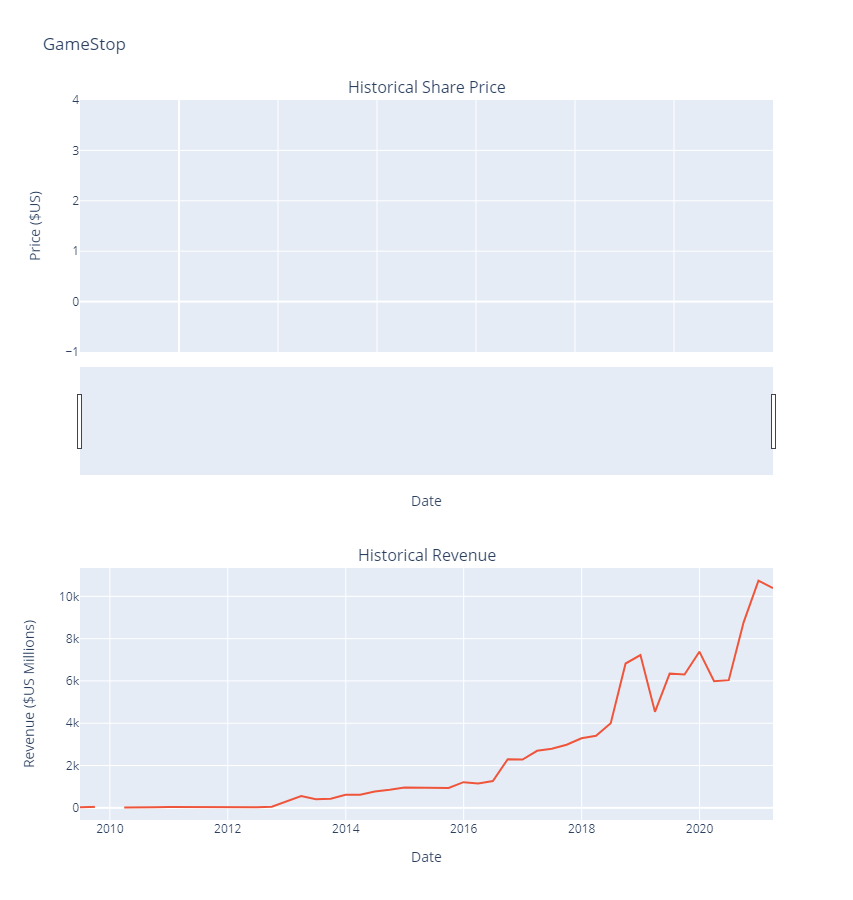

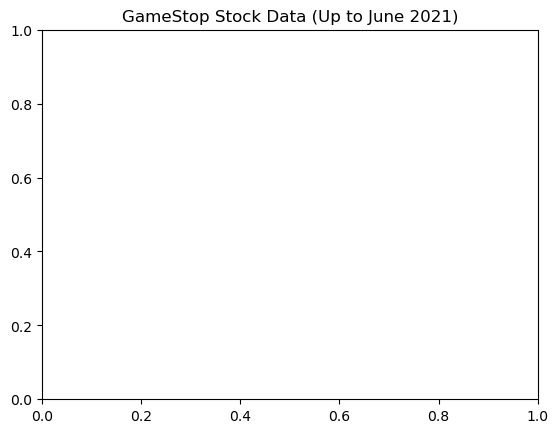

In [56]:
import matplotlib.pyplot as plt


make_graph(gme_data, gme_revenue, 'GameStop')

# Set the title for the graph
plt.title('GameStop Stock Data (Up to June 2021)')

# Display the graph
plt.show()

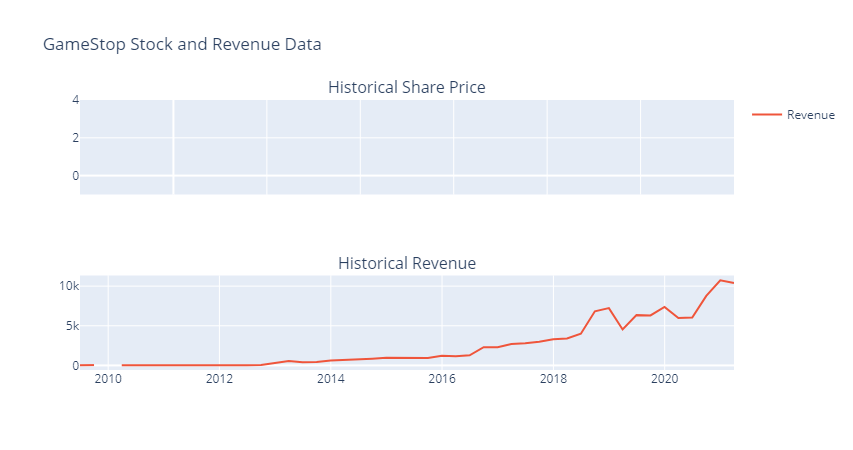

In [57]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)

    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']

    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    revenue_data['Revenue'] = revenue_data['Revenue'].replace('[\$,]', '', regex=True).astype(float)

    revenue_data_specific = revenue_data[revenue_data.Date <= pd.to_datetime('2021-04-30')]

    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue, name="Revenue"), row=2, col=1)

    fig.update_layout(showlegend=True, title_text=stock + " Stock and Revenue Data")
    fig.show()

    
make_graph(gme_data, gme_revenue, 'GameStop')

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
